In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load csv file
df = pd.read_csv('E:\Kaggle_Practise\CreditCardApproval\crx.data.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#convert column names into meaningful names
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

In [5]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
#inspect the column and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
#The following columns are incorrectly set as object, these need to be investigated
#Age

In [8]:
df['Age'].value_counts()

?        12
22.67     9
20.42     7
20.67     6
19.17     6
         ..
25.50     1
33.92     1
65.17     1
46.67     1
30.00     1
Name: Age, Length: 350, dtype: int64

In [9]:
# It can be seen that Age has '?' hence it is treated as object. This must be replaced with Null and then convert data type to Integer
df['Age'] = df['Age'].replace('?',np.nan)

In [10]:
df['Age'] = df['Age'].astype(float)

In [11]:
#inspect numerical column description
df.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [12]:
#Exploratory Data Analysis
df.isnull().sum()

Gender             0
Age               12
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

In [13]:
#Age feature has 12 NUll values

In [14]:
# 1. Analyze categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'ApprovalStatus']

In [15]:
print(" There are {} categorical variables \n".format(len(categorical)))
print(" The Categorical variables are :",categorical)

 There are 11 categorical variables 

 The Categorical variables are : ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']


In [16]:
# print unique values in each categorical variables
for var in categorical:
    print(df[var].value_counts())

b    468
a    210
?     12
Name: Gender, dtype: int64
u    519
y    163
?      6
l      2
Name: Married, dtype: int64
g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64
v     399
h     138
bb     59
ff     57
?       9
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
t    361
f    329
Name: PriorDefault, dtype: int64
f    395
t    295
Name: Employed, dtype: int64
f    374
t    316
Name: DriversLicense, dtype: int64
g    625
s     57
p      8
Name: Citizen, dtype: int64
00000    132
00120     35
00200     35
00160     34
00080     30
        ... 
00309      1
00422      1
00075      1
00840      1
00408      1
Name: ZipCode, Length: 171, dtype: int64
-    383
+    307
Name: ApprovalStatus, dtype: int64


In [17]:
# It is observed that features like Gender, Married, BankCustomer, EducationLevel, Ethnicity have ? values and needs to be replaced with Null
df['Gender'] = df['Gender'].replace('?',np.nan)
df['Married'] = df['Married'].replace('?',np.nan)
df['BankCustomer'] = df['BankCustomer'].replace('?',np.nan)
df['EducationLevel'] = df['EducationLevel'].replace('?',np.nan)
df['Ethnicity'] = df['Ethnicity'].replace('?',np.nan)

In [18]:
#All ? values are replaced
for str in categorical:
    print(df[str].str.contains('?',regex=False))

0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Name: Gender, Length: 690, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Name: Married, Length: 690, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Name: BankCustomer, Length: 690, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Name: EducationLevel, Length: 690, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Name: Ethnicity, Length: 690, dtype: object
0      False
1      False
2      False
3      False
4      Fal

In [19]:
# 2. Analyze the numerical values
numerical = [var for var in df.columns if df[var].dtype != 'O']

In [20]:
print(" There are {} numerical variables \n".format(len(numerical)))
print(" The numerical variables are :",numerical)

 There are 5 numerical variables 

 The numerical variables are : ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']


In [21]:
# print unique values in each categorical variables
for var in numerical:
    print(df[var].value_counts())

22.67    9
20.42    7
24.50    6
22.50    6
25.00    6
        ..
44.83    1
60.58    1
50.08    1
34.58    1
28.33    1
Name: Age, Length: 349, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
          ..
12.125     1
13.915     1
22.000     1
12.835     1
10.915     1
Name: Debt, Length: 215, dtype: int64
0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: YearsEmployed, Length: 132, dtype: int64
0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
8      10
9      10
14      8
12      8
10      8
15      4
16      3
17      2
20      2
40      1
13      1
19      1
23      1
67      1
Name: CreditScore, dtype: int64
0       295
1        29
1000     10
500      10
2         9
       ... 
2503      1
6590      1
1465      1
5552      1
283       1
Name: Income, Length: 240, dtype: int64


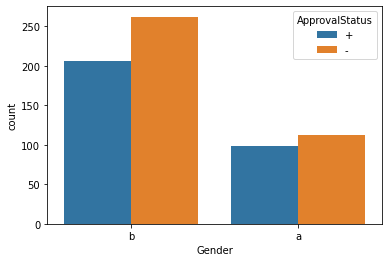

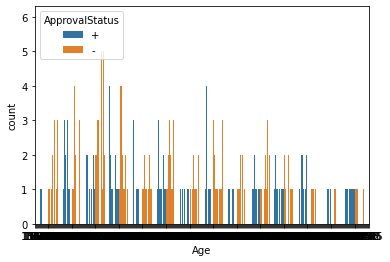

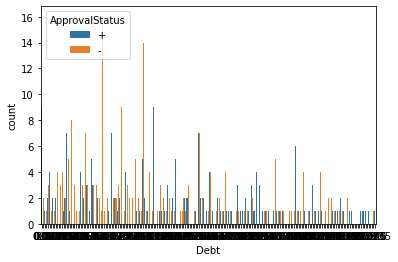

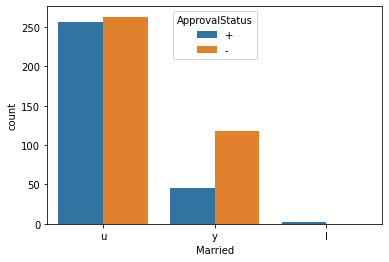

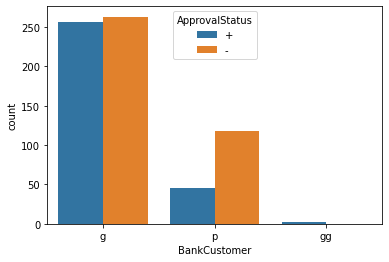

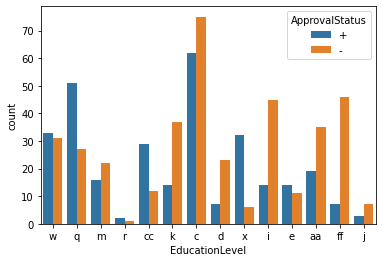

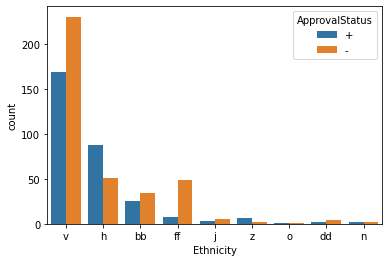

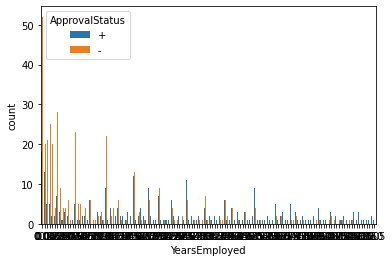

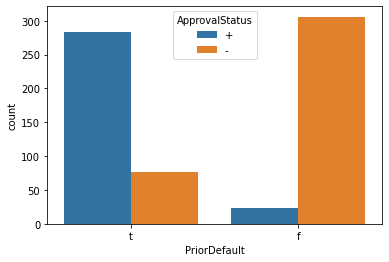

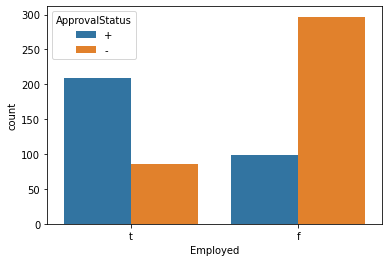

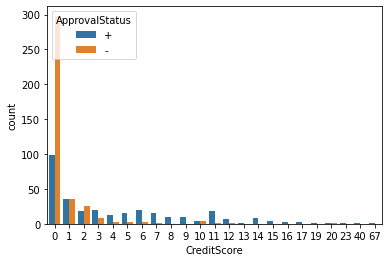

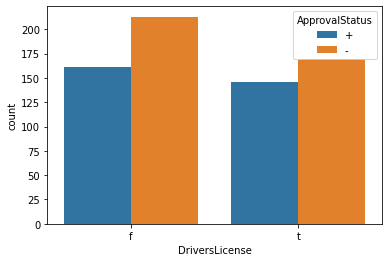

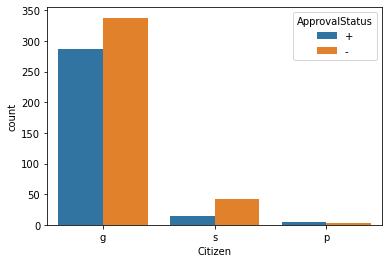

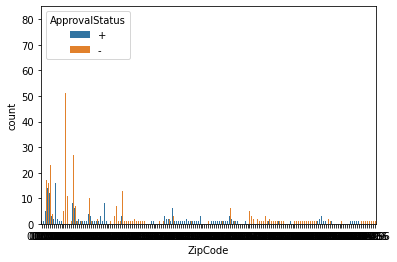

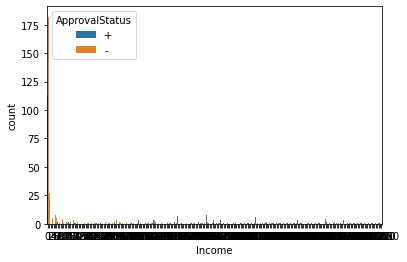

In [22]:
#Visual Analysis
#Univariate Analysis
for i,predictor in enumerate(df.drop(columns='ApprovalStatus')):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='ApprovalStatus')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Debt'}>],
       [<AxesSubplot:title={'center':'YearsEmployed'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

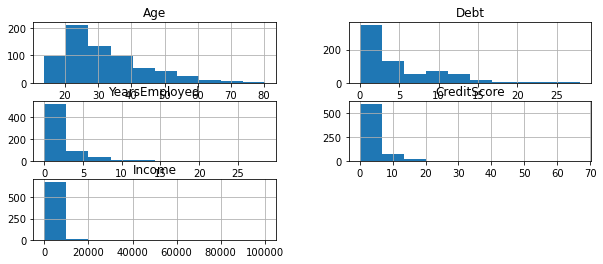

In [23]:
#Quantitative features
#Histograms
features = numerical
df[features].hist(figsize=(10,4))

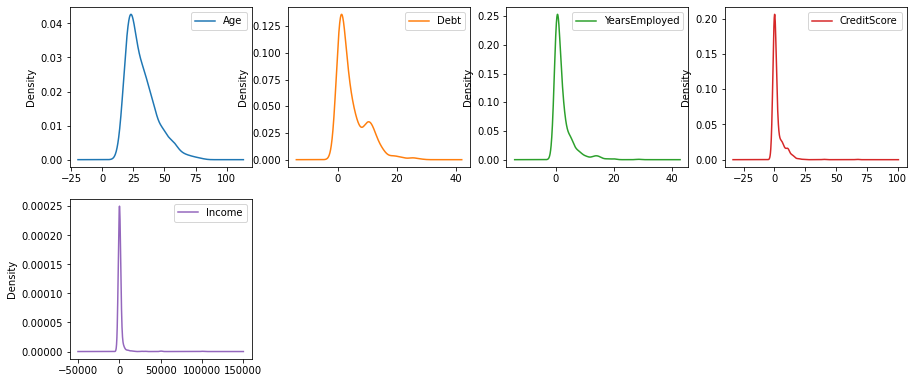

In [24]:
#Density plot
df[features].plot(
    kind="density", subplots=True, layout=(3, 4), sharex=False, figsize=(15, 10)
);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

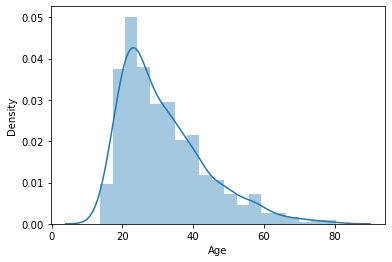

In [25]:
# distribution plot
sns.distplot(df["Age"])

<AxesSubplot:xlabel='YearsEmployed'>

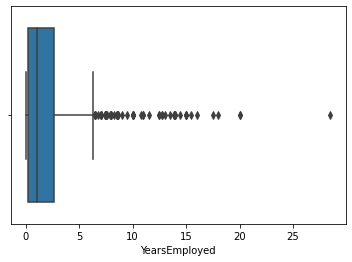

In [26]:
#Boxplot
sns.boxplot(x="YearsEmployed",data=df)

<AxesSubplot:xlabel='Debt'>

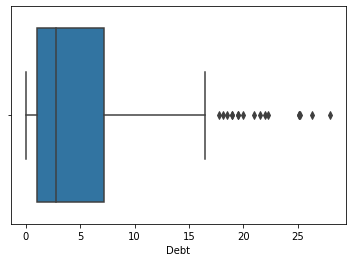

In [27]:
sns.boxplot(x="Debt",data=df)

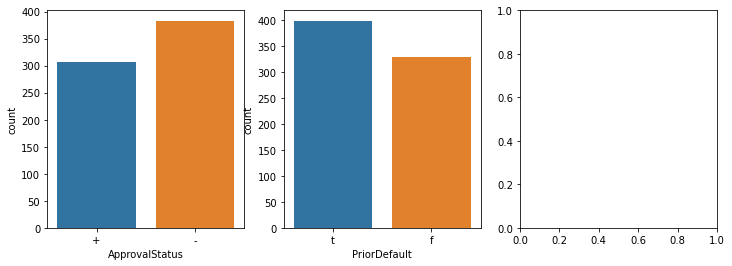

In [28]:
#Categorical features
#Barplot/Countplot
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.countplot(x="ApprovalStatus", data=df, ax=axes[0])
sns.countplot(x="EducationLevel", data=df, ax=axes[1])
sns.countplot(x="Ethnicity", data=df, ax=axes[1]);
sns.countplot(x="PriorDefault", data=df, ax=axes[1]);

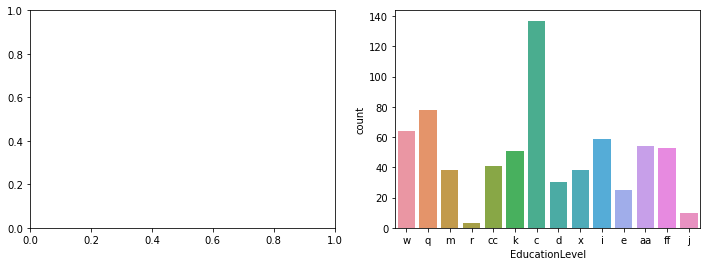

In [29]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x="EducationLevel", data=df, ax=axes[1]);

<AxesSubplot:>

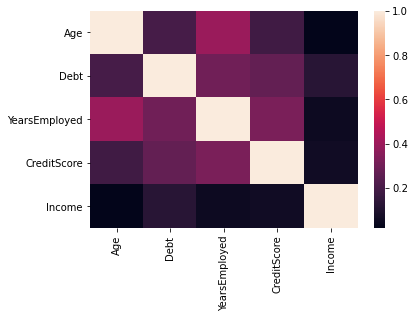

In [30]:
#Multivariate visualization
#Quantitative vs Quantitative
#Correlation matrix
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

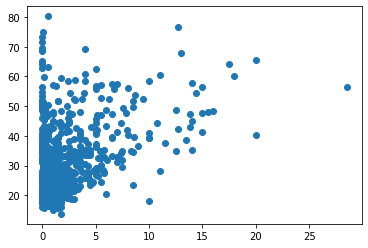

In [31]:
#Scatter Plot
plt.scatter(df['YearsEmployed'],df['Age'])

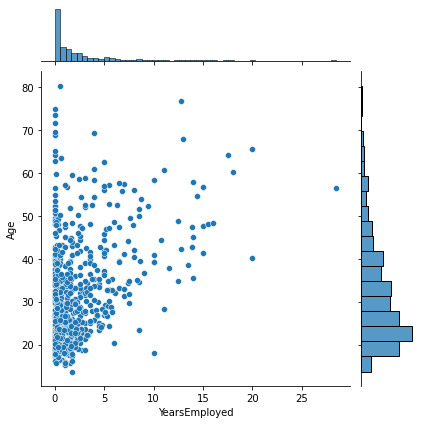

In [32]:
# Seaborn joinplot
sns.jointplot(x="YearsEmployed",y="Age",data=df,kind="scatter")

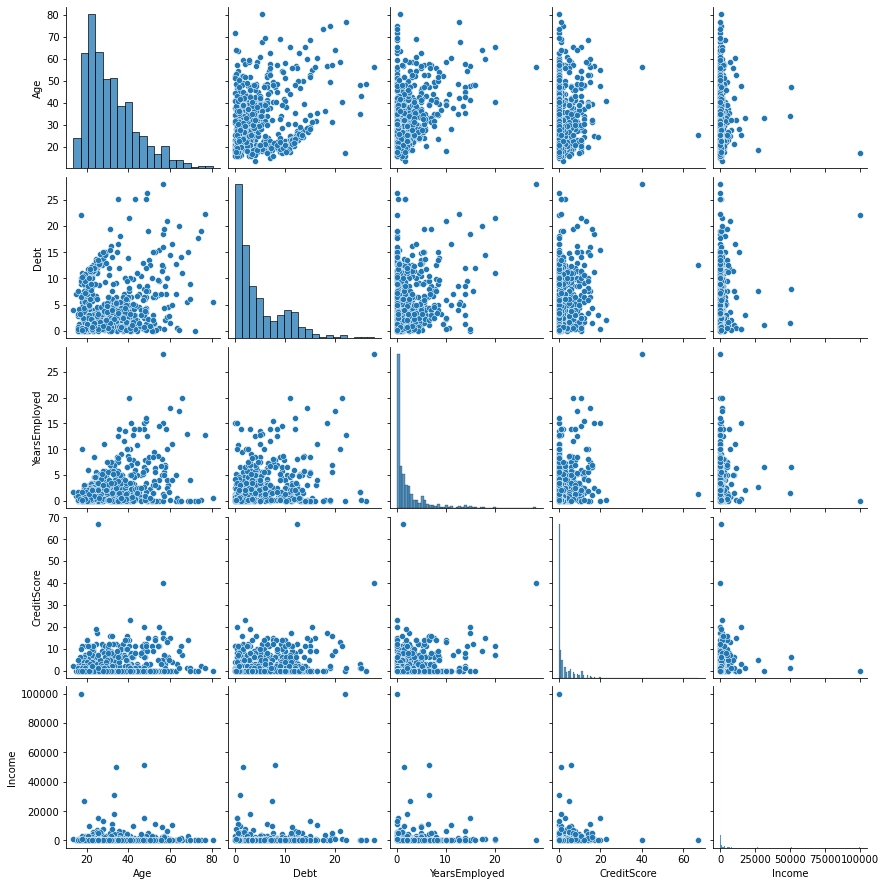

In [33]:
#scatterplot matrix - pairplot
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [34]:
%config InlineBackend.figure_format = 'retina'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


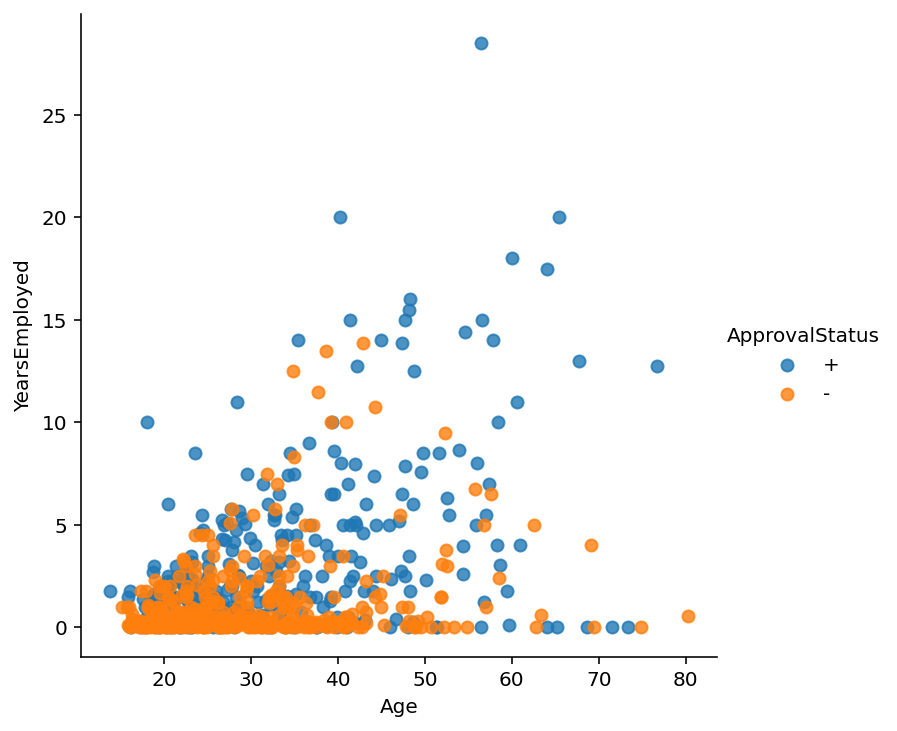

In [35]:
#Quantitative vs categorical
#lmplot
sns.lmplot(
    "Age", "YearsEmployed", data=df, hue="ApprovalStatus", fit_reg=False
);

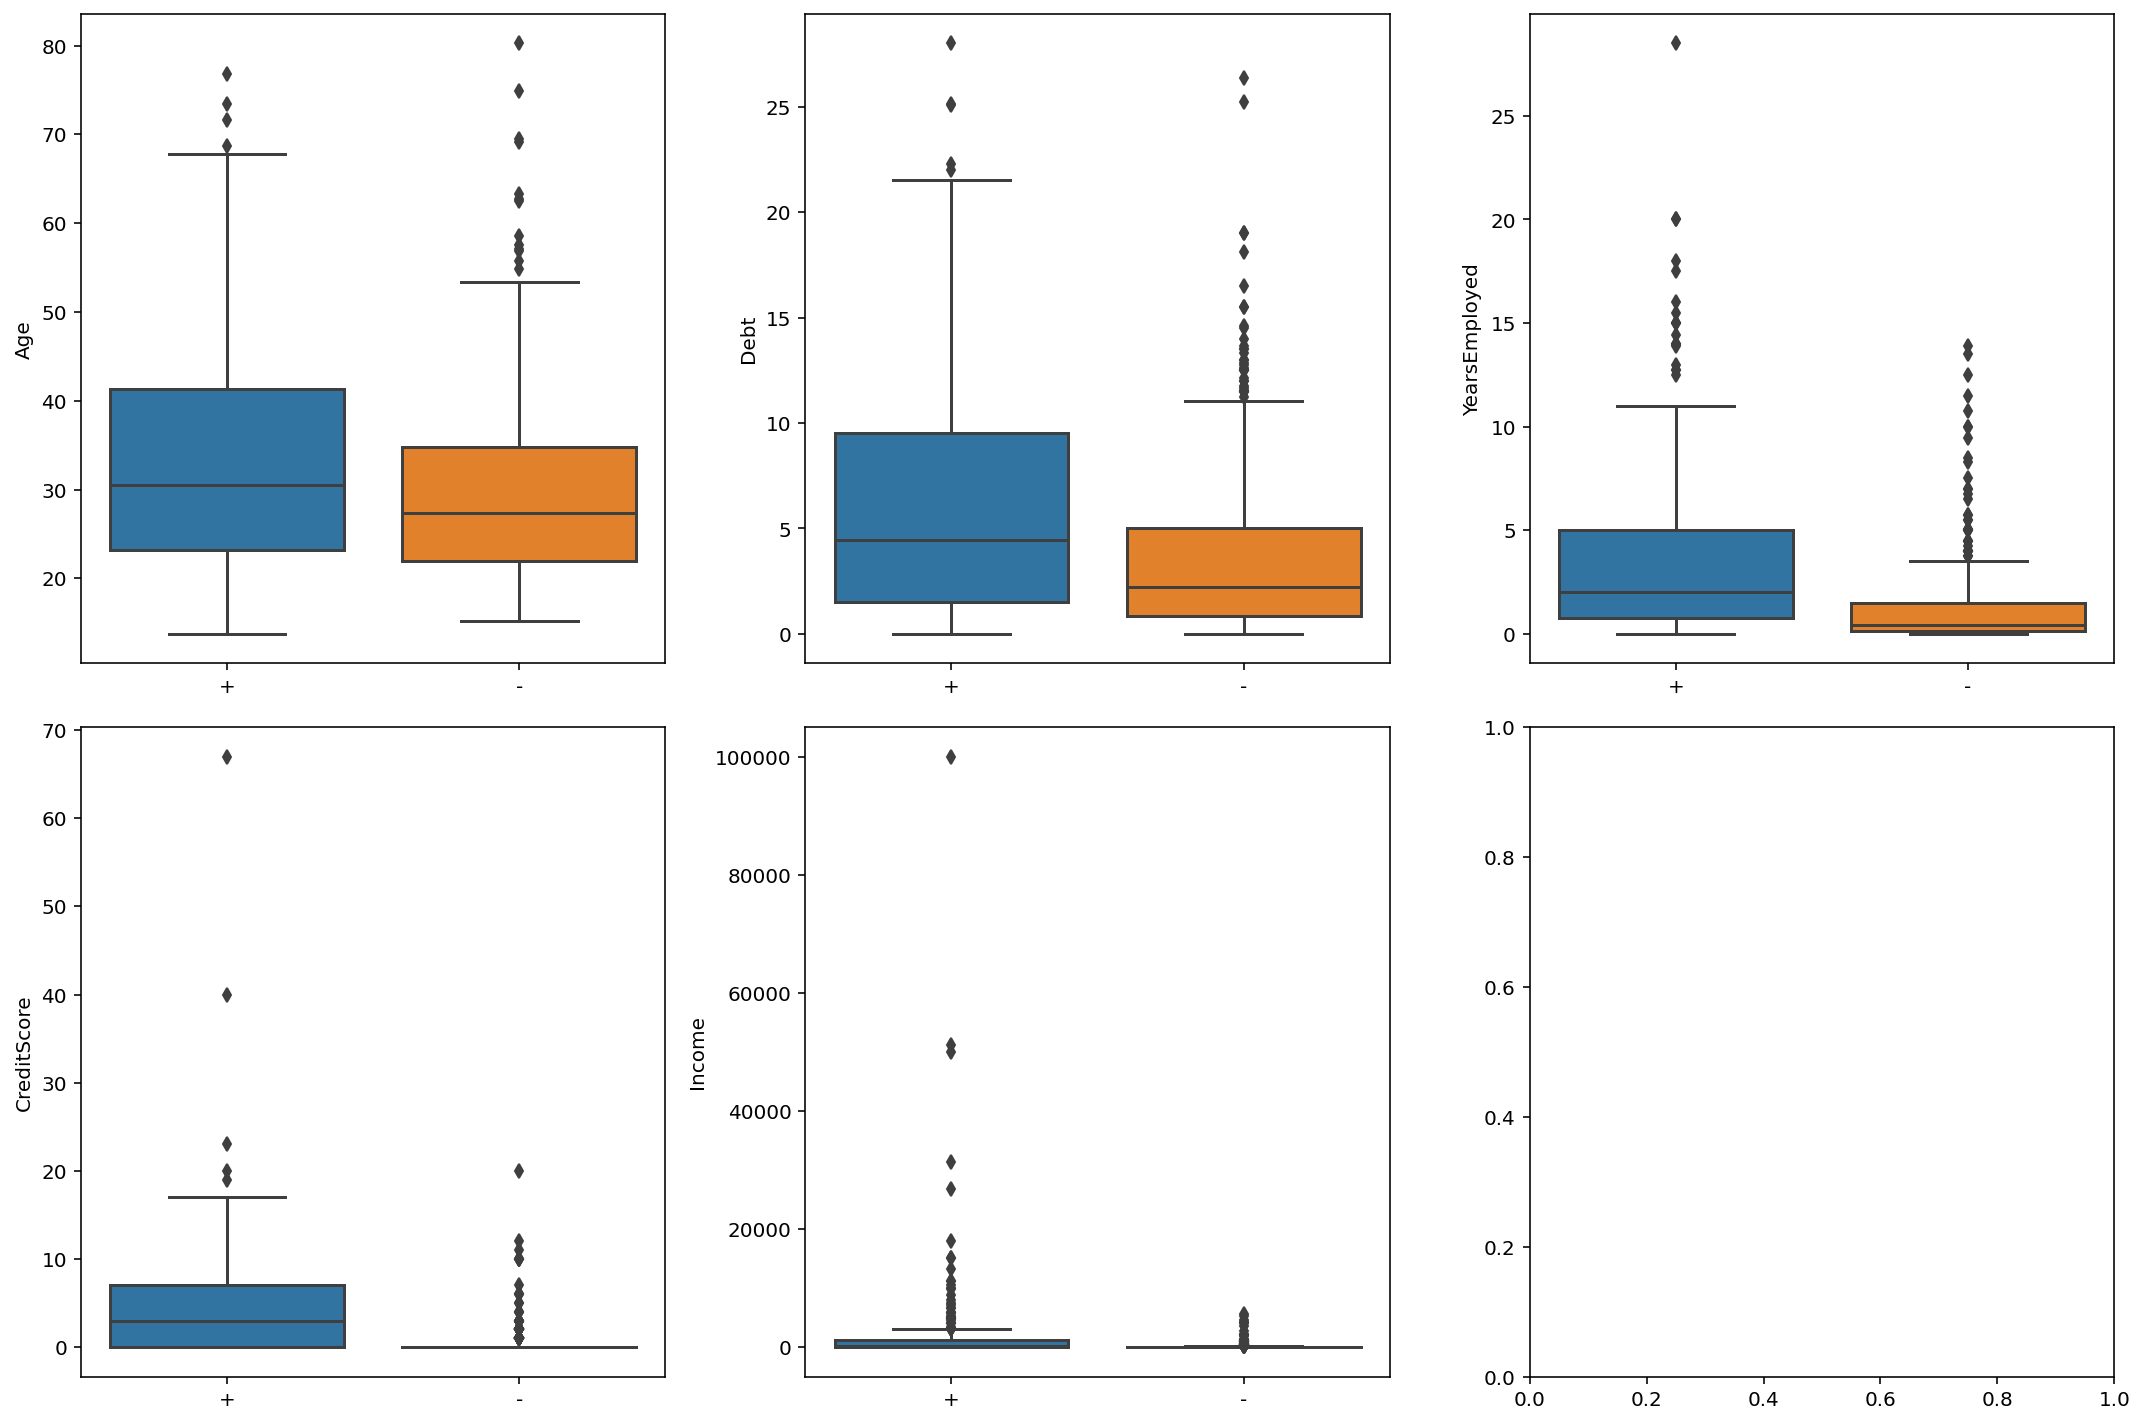

In [36]:
#Boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 3), idx % 3]
    sns.boxplot(x="ApprovalStatus", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

<AxesSubplot:xlabel='Gender', ylabel='count'>

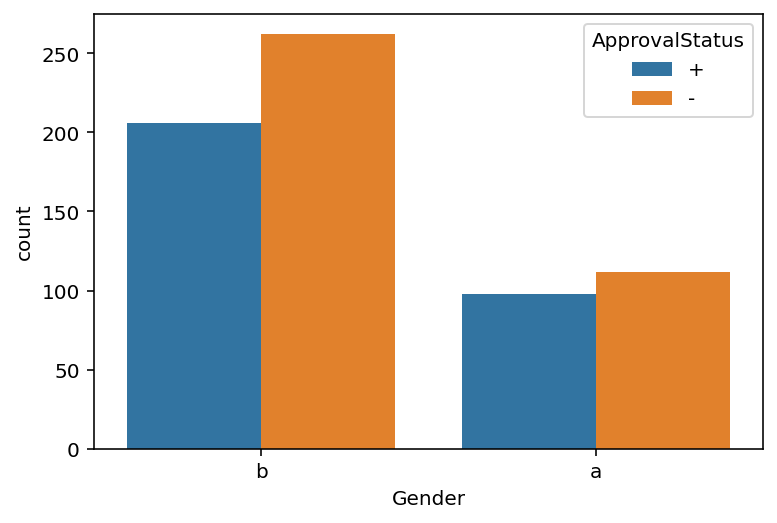

In [37]:
#categorical vs categorical
sns.countplot(x="Gender",hue="ApprovalStatus",data=df)

<AxesSubplot:xlabel='EducationLevel', ylabel='count'>

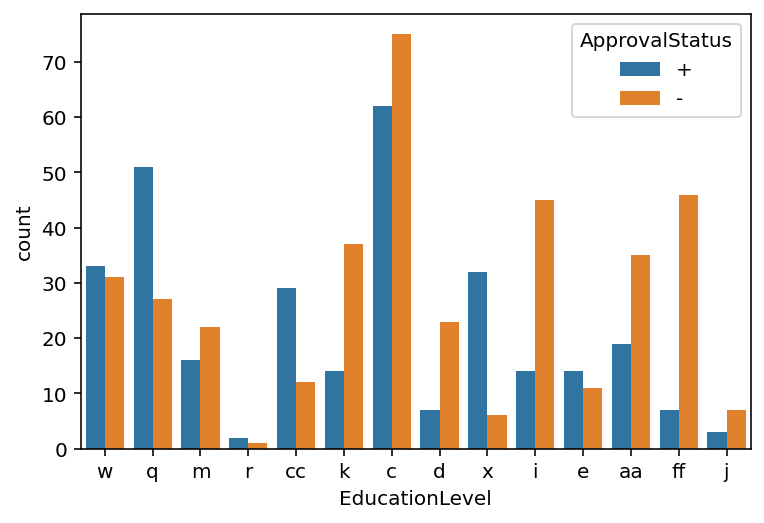

In [38]:
sns.countplot(x="EducationLevel",hue="ApprovalStatus",data=df)

In [39]:
#Feature Engineering
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

In [40]:
#Gender and Age features have null values, they need to be processed
df[df['Gender'].isnull() == True]

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,01160,0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,00372,122,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,00260,1004,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,00300,0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,00080,0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,00263,0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,00160,234,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,00150,1,-


In [41]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [42]:
#check the categorical features for NULL values
for var in categorical:
    print(var,df[var].isnull().sum())

Gender 12
Married 6
BankCustomer 6
EducationLevel 9
Ethnicity 9
PriorDefault 0
Employed 0
DriversLicense 0
Citizen 0
ZipCode 0
ApprovalStatus 0


In [43]:
#We have null values in Gender, Married, BankCustomer, EducationLevel, Ethnicity
#replace null values with mode value
for col in categorical:
    df[col].fillna(df[col].mode()[0],inplace = True)

In [44]:
df.isnull().values.any()

True

In [45]:
for var in categorical:
    print(var,df[var].isnull().sum())

Gender 0
Married 0
BankCustomer 0
EducationLevel 0
Ethnicity 0
PriorDefault 0
Employed 0
DriversLicense 0
Citizen 0
ZipCode 0
ApprovalStatus 0


In [46]:
df.isnull().sum()

Gender             0
Age               12
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

In [48]:
#Age still has null values, we can replace with mode
df['Age'].fillna(df['Age'].mode()[0],inplace = True)

In [49]:
df['Age'].describe()

count    690.000000
mean      31.413420
std       11.910293
min       13.750000
25%       22.670000
50%       28.170000
75%       37.707500
max       80.250000
Name: Age, dtype: float64

In [50]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [51]:
#All null values are replaced. 
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [52]:
#convert Target variable to numeric
df['ApprovalStatus'] = np.where(df.ApprovalStatus == '+',1,0)

In [53]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,0


In [54]:
df_get_dummies = pd.get_dummies(df)
df_get_dummies.head()

,Age,Debt,YearsEmployed,CreditScore,Income,ApprovalStatus,Gender_a,Gender_b,Married_l,Married_u,...,ZipCode_00680,ZipCode_00711,ZipCode_00720,ZipCode_00760,ZipCode_00840,ZipCode_00928,ZipCode_00980,ZipCode_01160,ZipCode_02000,ZipCode_?
0,30.83,0.000,1.25,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,58.67,4.460,3.04,6,560,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,24.50,0.500,1.50,0,824,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,27.83,1.540,3.75,5,3,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.17,5.625,1.71,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = df_get_dummies.drop('ApprovalStatus',axis = 1)

In [57]:
y = df_get_dummies['ApprovalStatus']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 42)

In [59]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier,ExtraTreeClassifier)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, 
GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [63]:
clf = [KNeighborsClassifier(n_neighbors=13),DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),
      ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10,learning_rate=1,max_features=3,max_depth=3,random_state=10),
                                 AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i],X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
model_fit()

Score of Model 0 : 74.13
Score of Model 1 : 83.02
Score of Model 2 : 86.34
Score of Model 3 : 84.49
Score of Model 4 : 66.46
Score of Model 5 : 80.75
Score of Model 6 : 72.47
Score of Model 7 : 84.9
Score of Model 8 : 86.35


In [65]:
clf1 = RandomForestClassifier()
clf1.fit(X_train,y_train)
prediction = clf1.predict(X_test)

In [66]:
X_test['ApprovalStatus'] = prediction
X_test.head()

<ipython-input-66-df5d5634f06a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ApprovalStatus'] = prediction


,Age,Debt,YearsEmployed,CreditScore,Income,Gender_a,Gender_b,Married_l,Married_u,Married_y,...,ZipCode_00711,ZipCode_00720,ZipCode_00760,ZipCode_00840,ZipCode_00928,ZipCode_00980,ZipCode_01160,ZipCode_02000,ZipCode_?,ApprovalStatus
286,22.67,1.5,0.0,2,105,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
511,46.00,4.0,0.0,0,960,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
257,20.00,0.0,0.5,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
336,47.33,6.5,1.0,0,228,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
318,19.17,0.0,0.0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[94 16]
 [14 83]]

True Positives(TP) =  94

True Negatives(TN) =  83

False Positives(FP) =  16

False Negatives(FN) =  14


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.84      0.86      0.85        97

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207



In [69]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [70]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8551


In [71]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1449


In [72]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8545


In [73]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8704


In [74]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8704


In [75]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1616


In [76]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8384


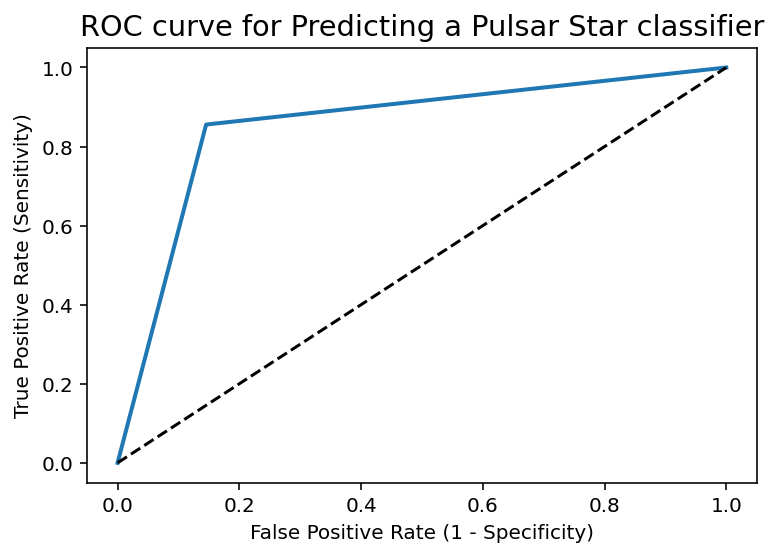

In [77]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [79]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8551
